In [1]:
import pandas as pd
data=pd.read_csv("health care diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
data.shape

(768, 9)

In [4]:
data.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [7]:
print(data[data['Glucose'] ==0].shape)
print(data[data['BloodPressure'] ==0].shape)
print(data[data['SkinThickness'] ==0].shape)
print(data[data['Insulin'] ==0].shape)
print(data[data['BMI'] ==0].shape)


(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)


In [8]:
print(data[data['SkinThickness']!=0]['SkinThickness'].describe())
print(data[data['Insulin']!=0]['Insulin'].describe())

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64
count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64


(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

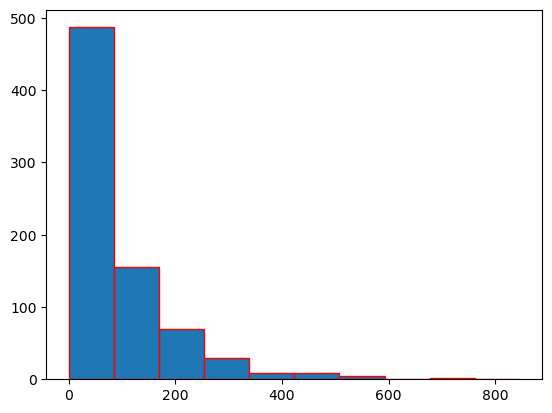

In [12]:
import matplotlib.pyplot as plt
plt.hist(data['Insulin'],edgecolor='red')


(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

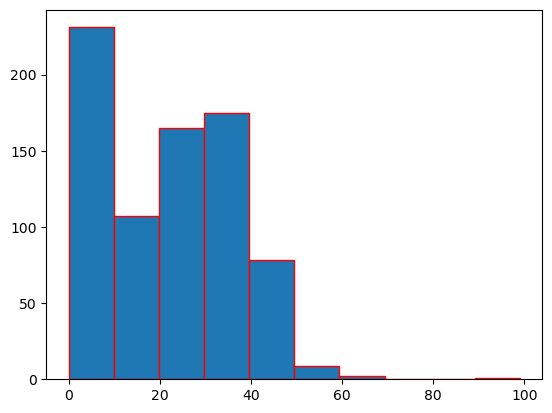

In [11]:
plt.hist(data['SkinThickness'],edgecolor='red')

In [13]:
from numpy import nan
dataset_imputed = data
dataset_imputed[['SkinThickness','Insulin']] = dataset_imputed[['SkinThickness','Insulin']].replace(0, nan)
dataset_imputed.fillna(dataset_imputed.mean(), inplace=True)

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

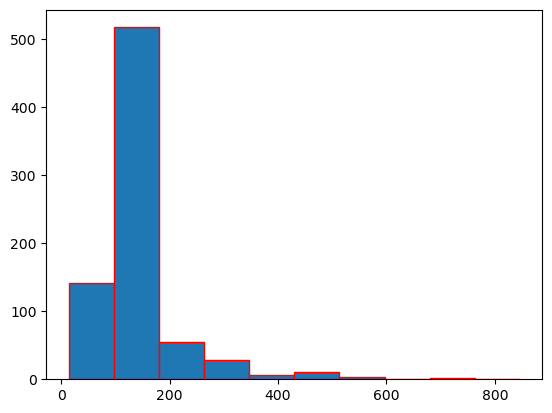

In [14]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')

In [15]:
dataset_imputed.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      29.153420  155.548223   
std       3.369578   31.972618      19.355807       8.790942   85.021108   
min       0.000000    0.000000       0.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [16]:
dataset_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

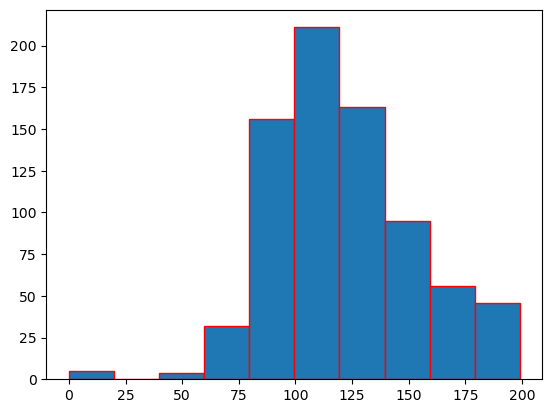

In [17]:
plt.hist(dataset_imputed['Glucose'],edgecolor='red')


(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

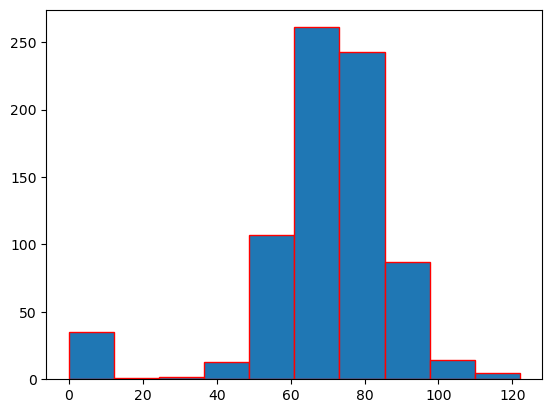

In [18]:
plt.hist(dataset_imputed['BloodPressure'],edgecolor='red')

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

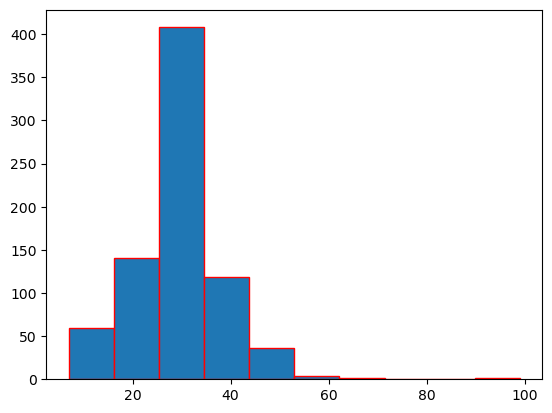

In [19]:
plt.hist(dataset_imputed['SkinThickness'],edgecolor='red')

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

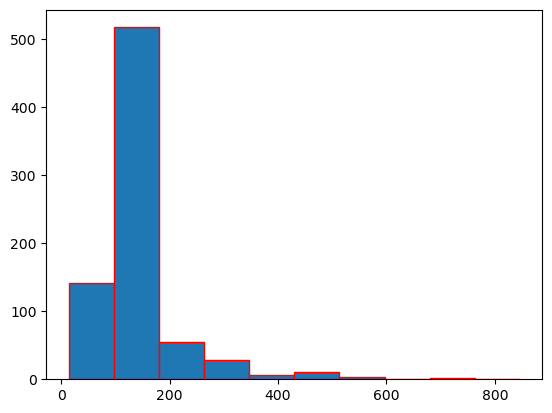

In [20]:
plt.hist(dataset_imputed['Insulin'],edgecolor='red')

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

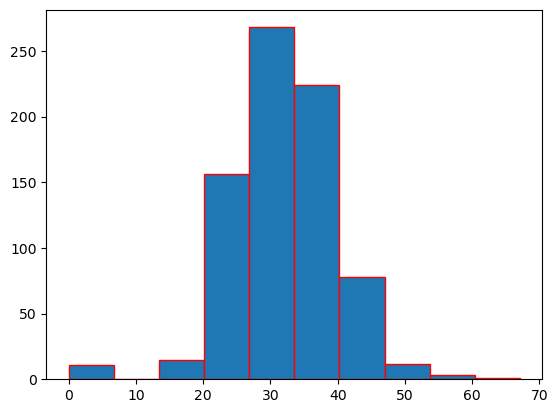

In [21]:
plt.hist(dataset_imputed['BMI'],edgecolor='red')

In [22]:
dataset_imputed.describe().transpose()

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  120.894531  31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469  19.355807   0.000   62.00000   
SkinThickness             768.0   29.153420   8.790942   7.000   25.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   31.992578   7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max  
Pregnancies                 3.000000    6.000000   17.00  
Glucose                   117.000000  140.250000  199.00  
BloodPressure              72.000000   80.000000  122.00  
SkinThickness              29.153420   32.000000   99.00  
Insulin                   155.548223  155.548223  846.00  
BMI                        32.000000   36.600000   67.10  
DiabetesPedigreeFunction    0.372500    0.626250    2.42  
Age                        29.000000   41.000000   81.00  
Outcome                     0.000000    1.000000    1.00

In [23]:
Positive = dataset_imputed[dataset_imputed['Outcome']==1]
print(Positive.head(5))
Negative = dataset_imputed[dataset_imputed['Outcome']==0]
print(Negative.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6      148             72       35.00000  155.548223  33.6   
2            8      183             64       29.15342  155.548223  23.3   
4            0      137             40       35.00000  168.000000  43.1   
6            3       78             50       32.00000   88.000000  31.0   
8            2      197             70       45.00000  543.000000  30.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
2                     0.672   32        1  
4                     2.288   33        1  
6                     0.248   26        1  
8                     0.158   53        1  
    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
1             1       85             66       29.00000  155.548223  26.6   
3             1       89             66       23.00000   94.000000  28.1   
5             5      116             74       29.15342  1

In [24]:
print(Positive.shape)
print(Negative.shape)

(268, 9)
(500, 9)


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x1d49c468d00>])

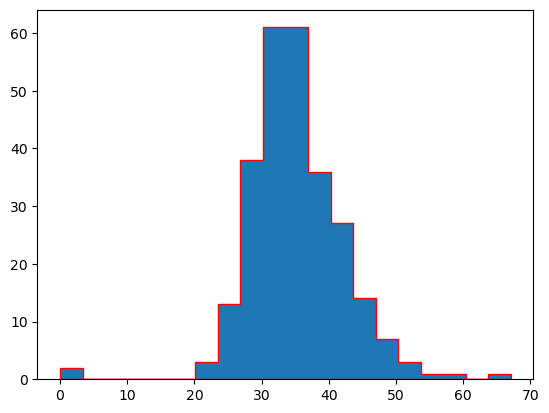

In [25]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20,edgecolor='red')

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 [<matplotlib.patches.Polygon at 0x1d49c4cf250>])

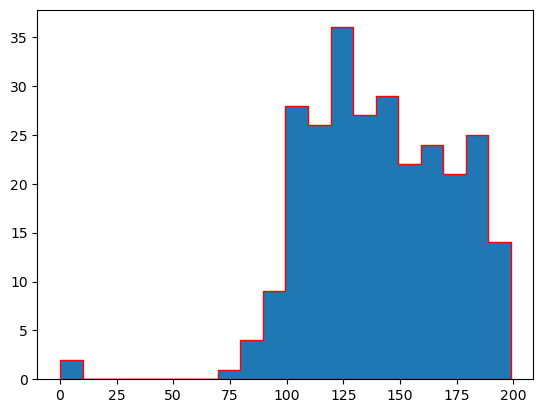

In [26]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20,edgecolor='red')

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 [<matplotlib.patches.Polygon at 0x1d49c55e950>])

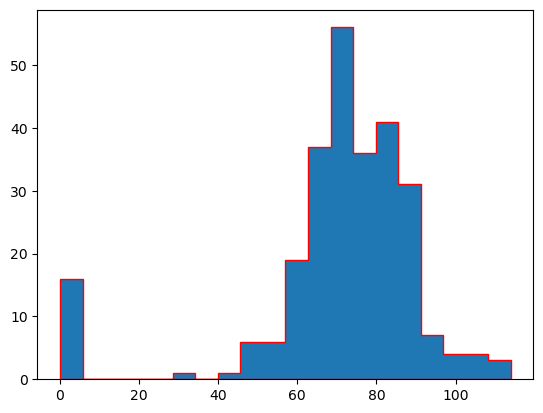

In [27]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20,edgecolor='red')

(array([  1.,   5.,  11.,  21., 113.,  41.,  34.,  20.,  15.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 [<matplotlib.patches.Polygon at 0x1d49c5cf550>])

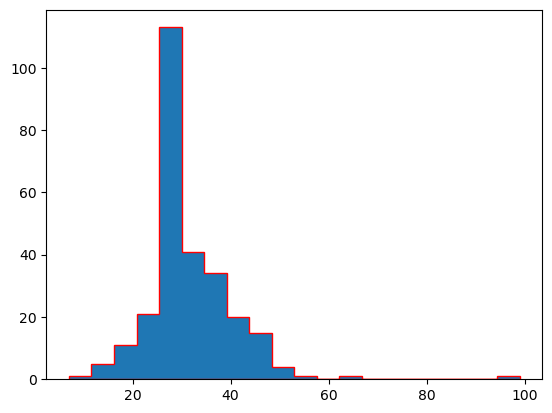

In [28]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20,edgecolor='red')

(array([  4.,  12.,  27., 169.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 [<matplotlib.patches.Polygon at 0x1d49c64d300>])

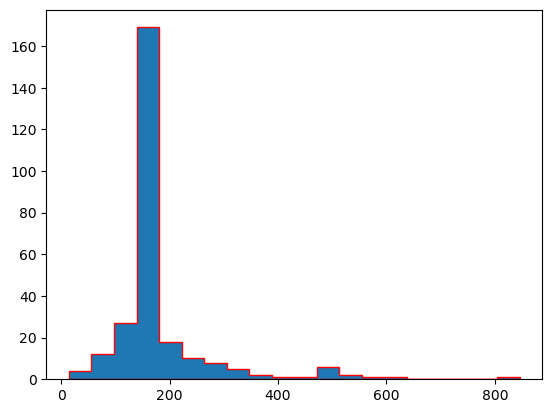

In [29]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20,edgecolor='red')

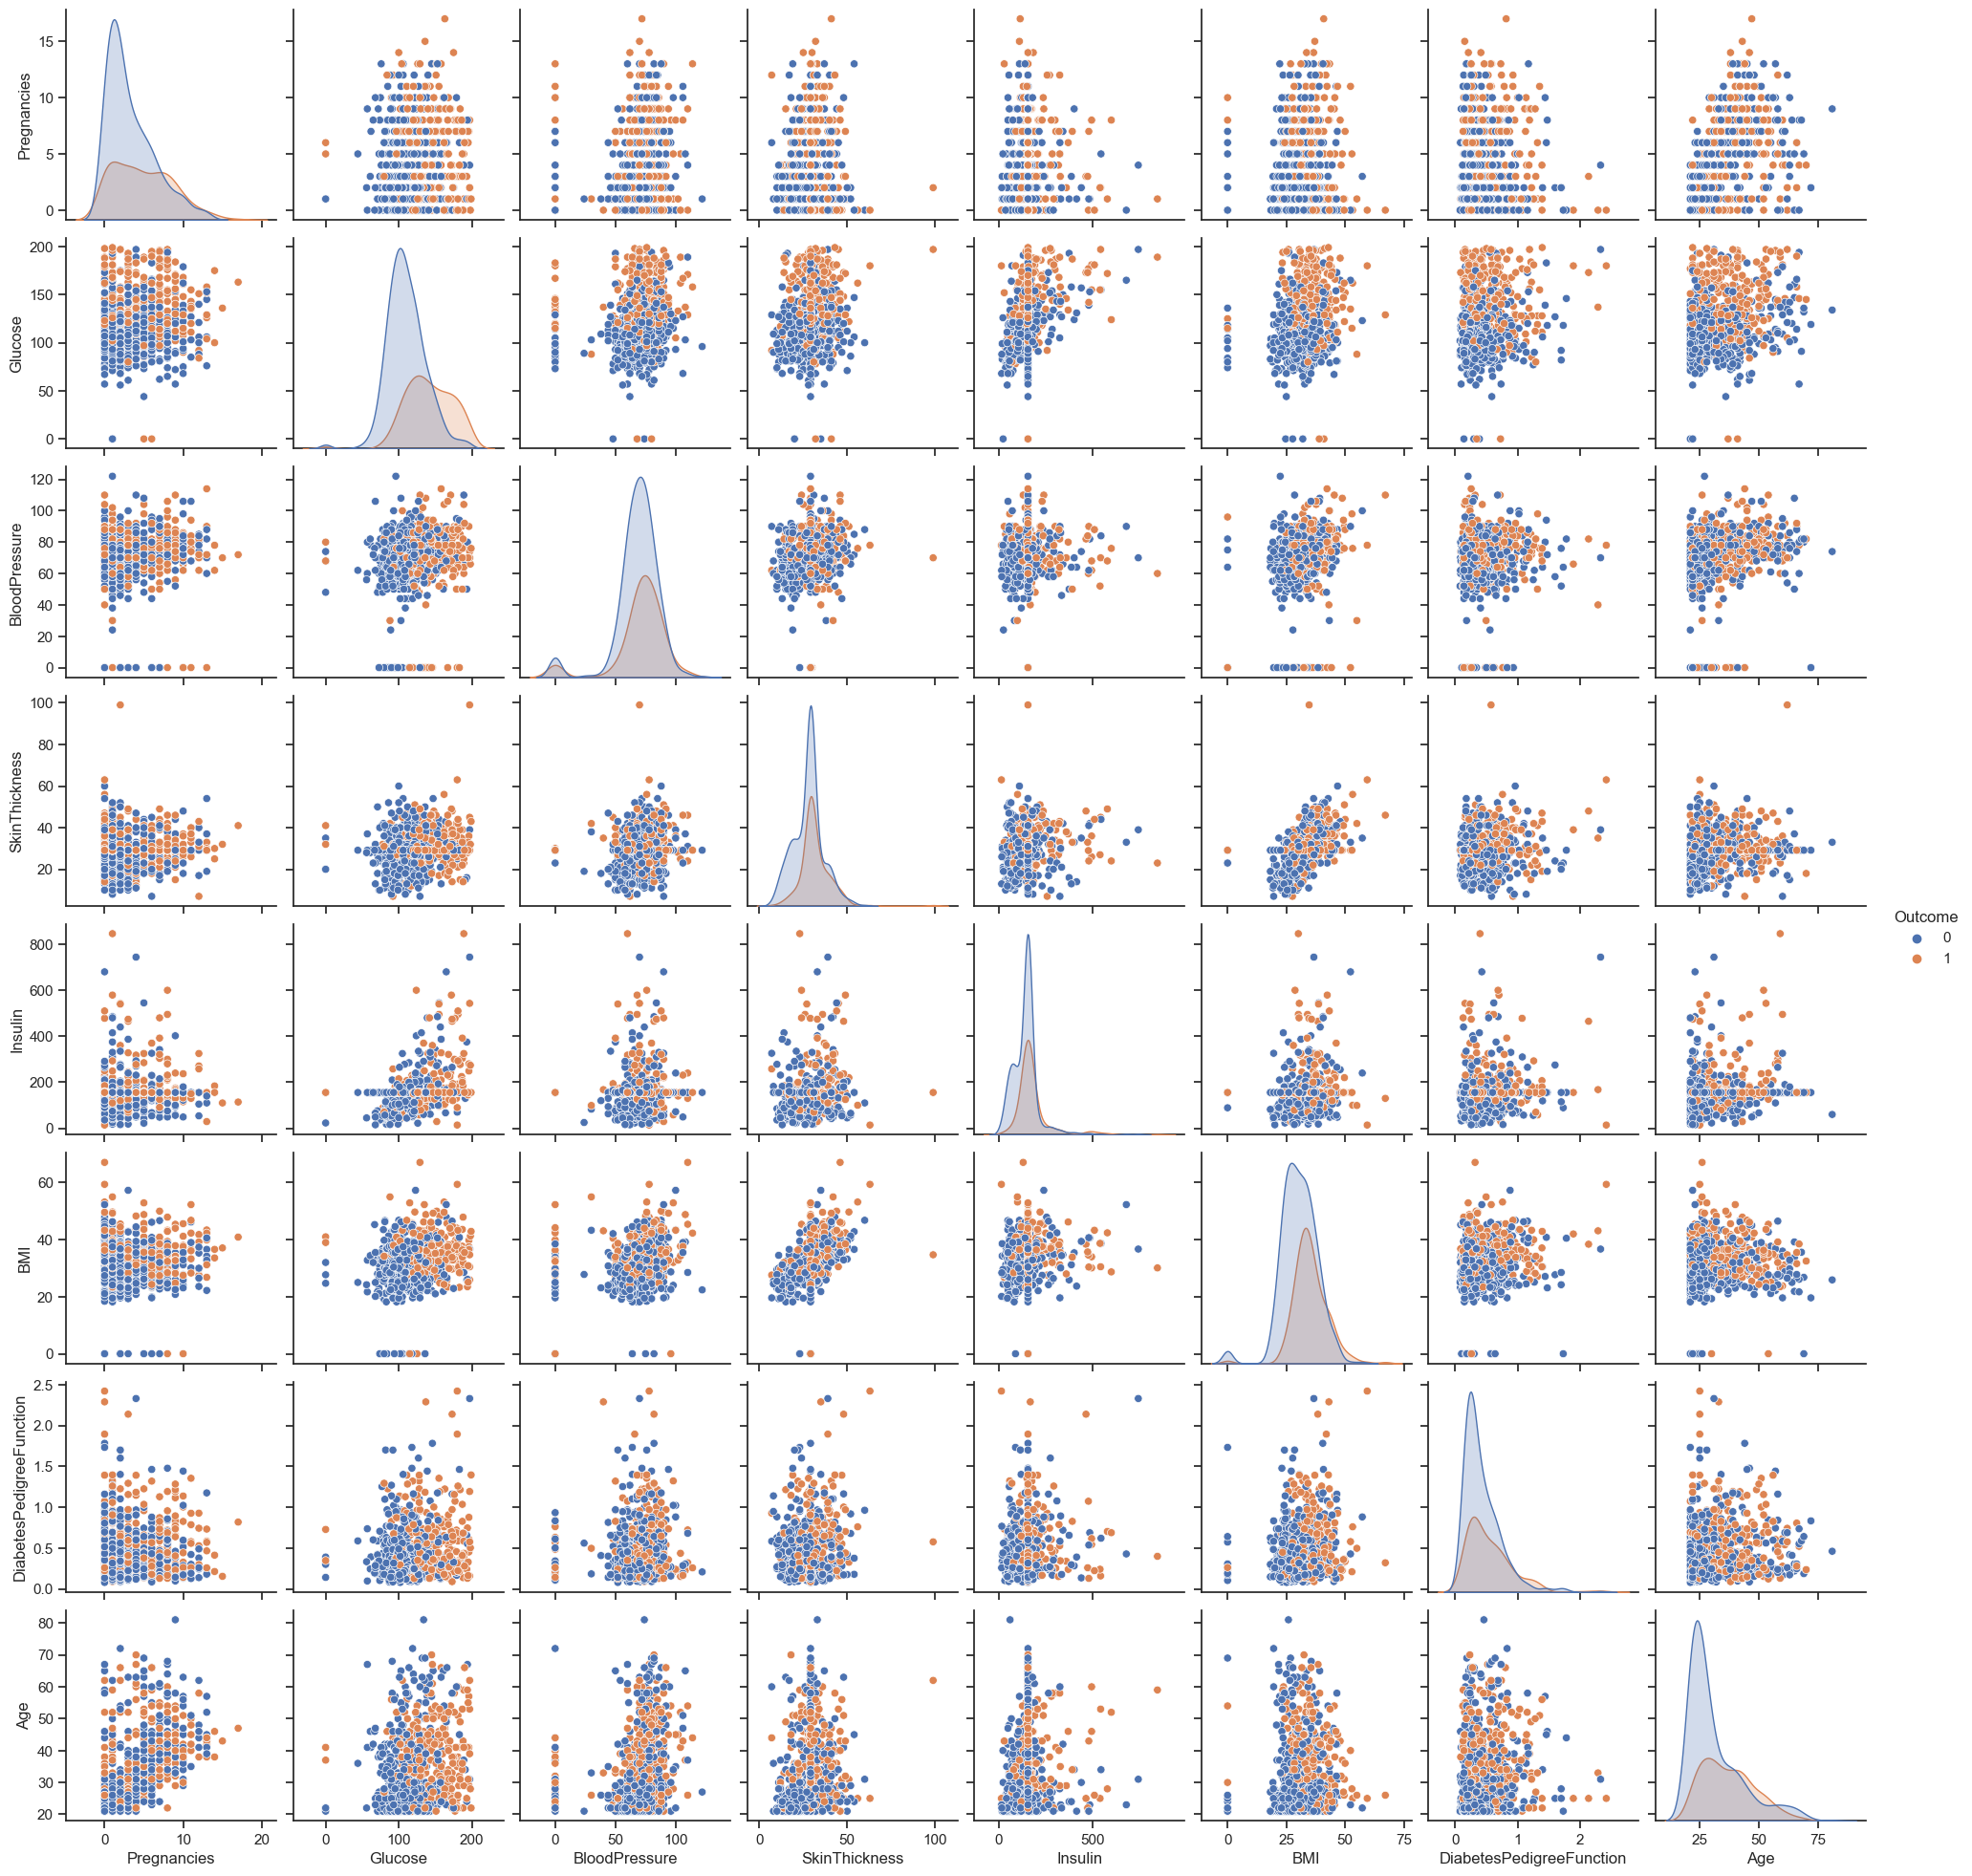

In [30]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset_imputed,hue="Outcome")

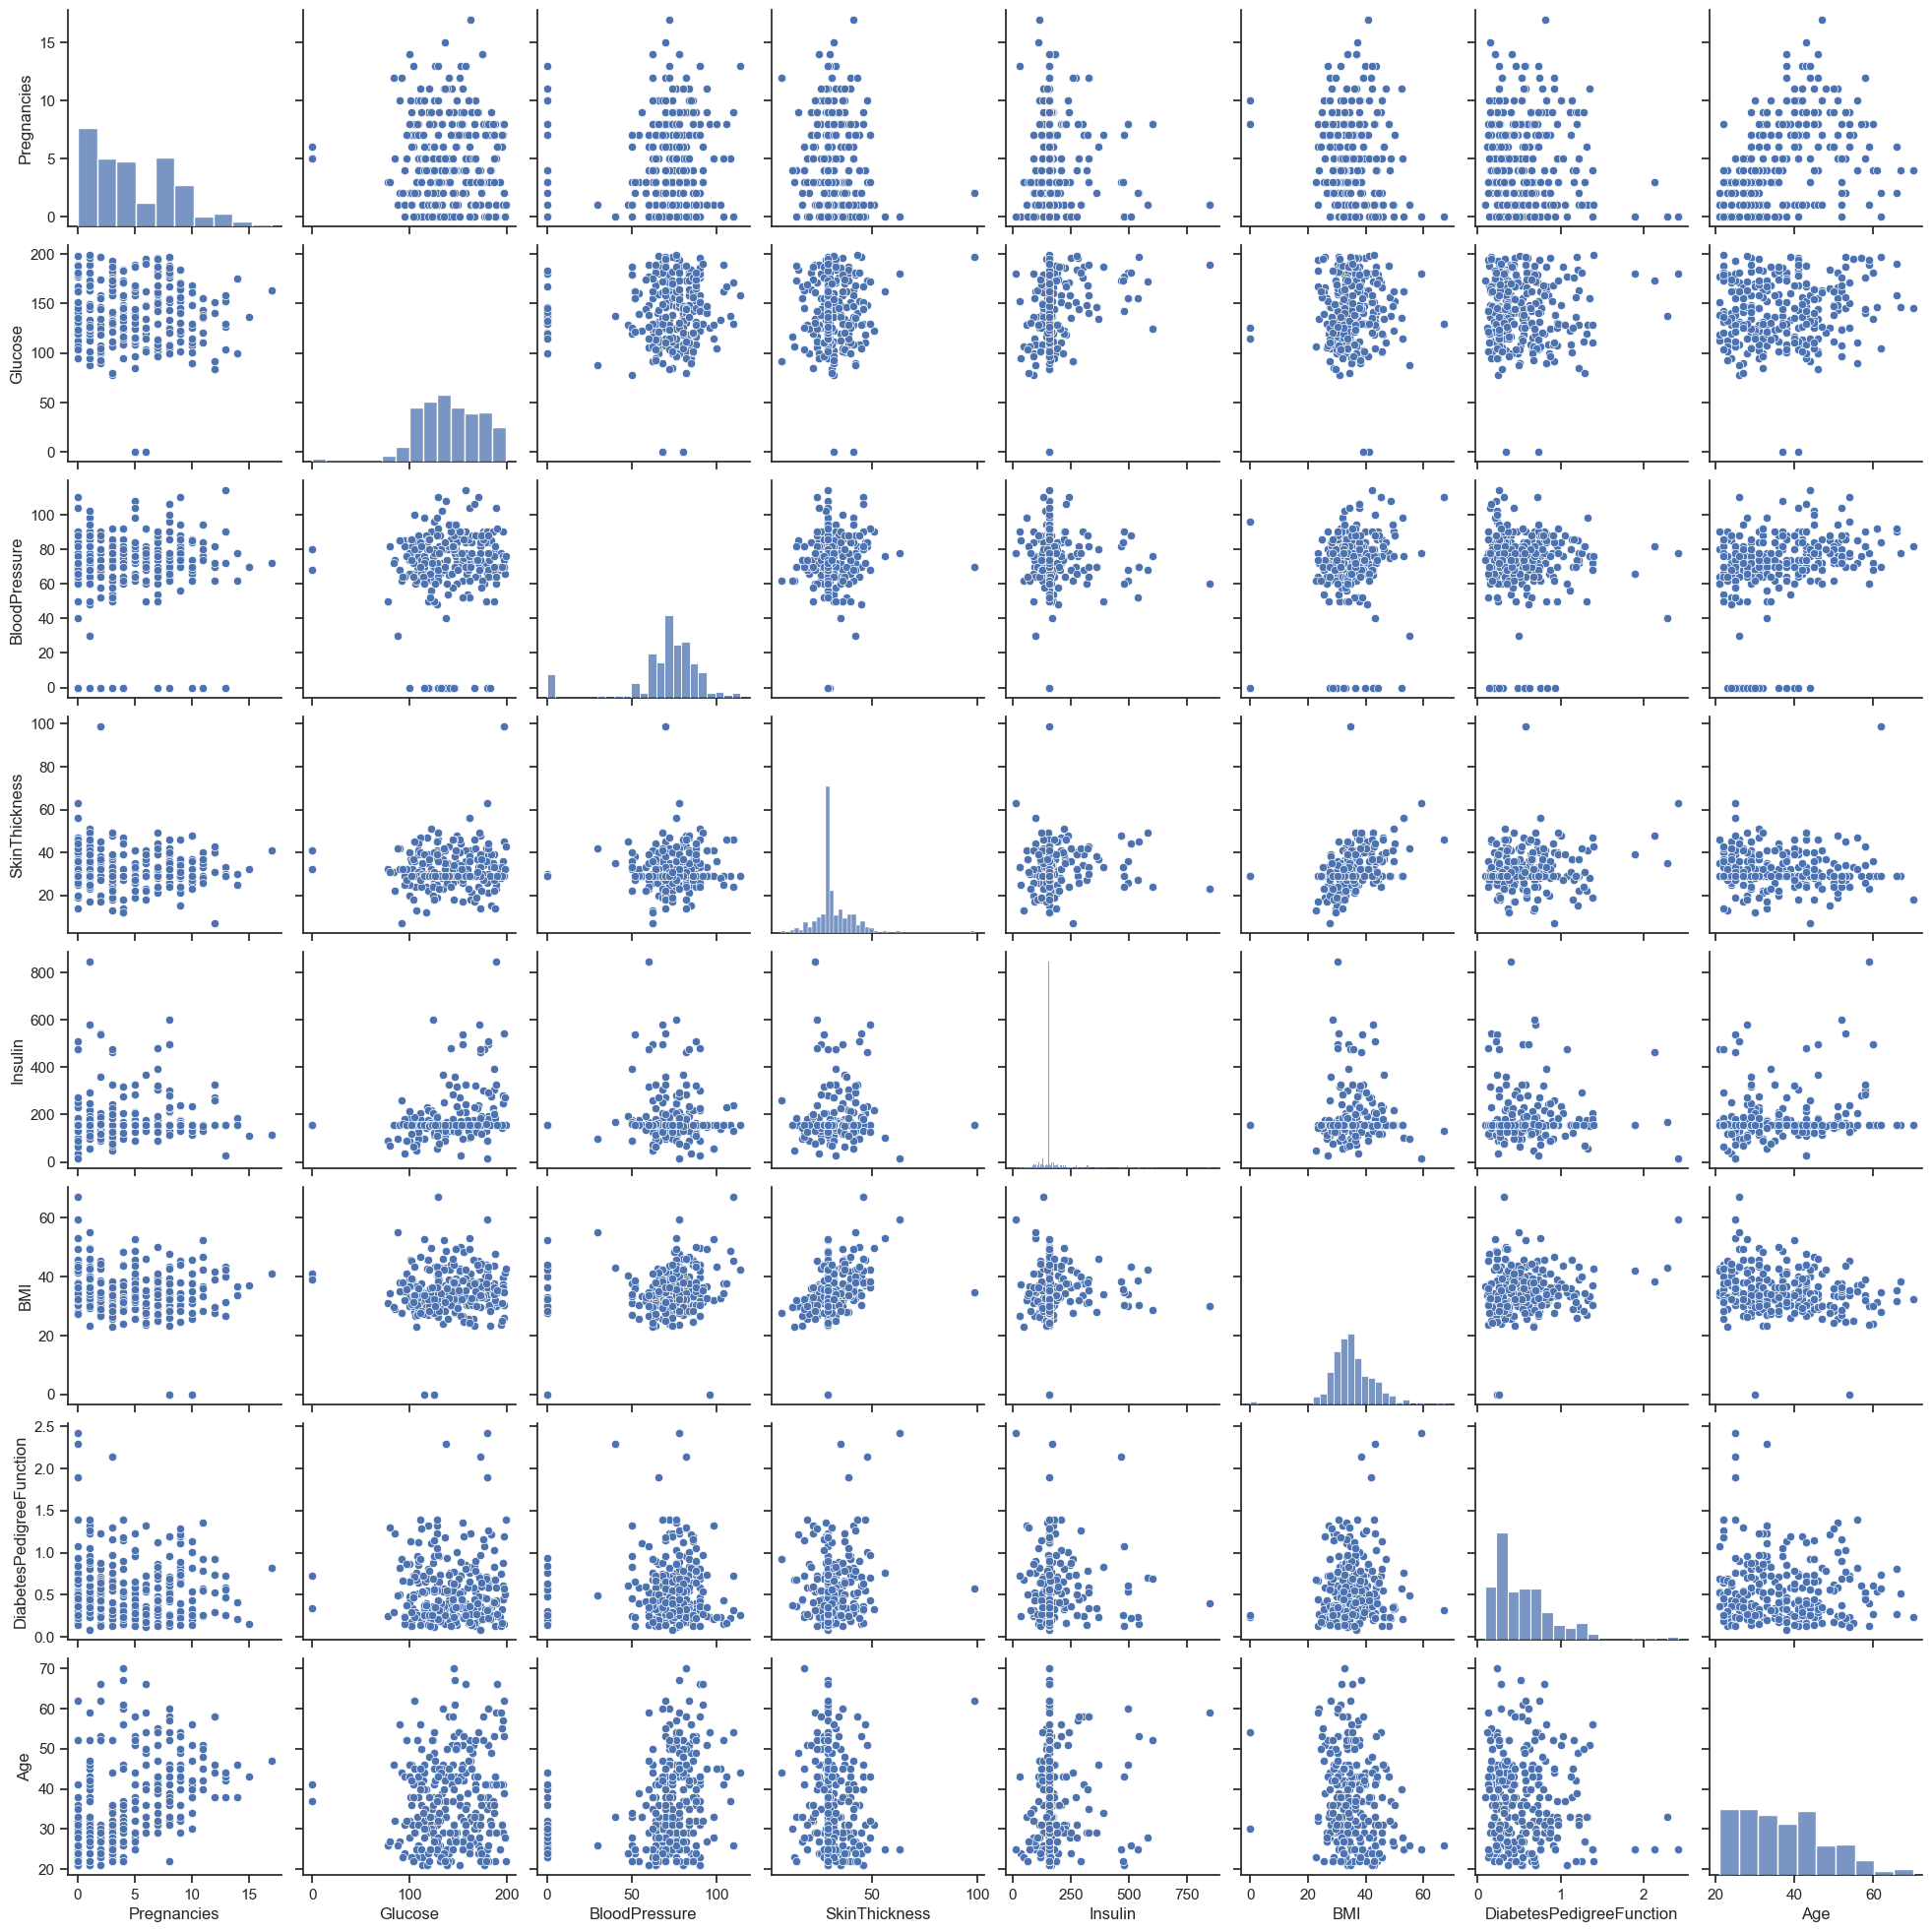

In [31]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Positive[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

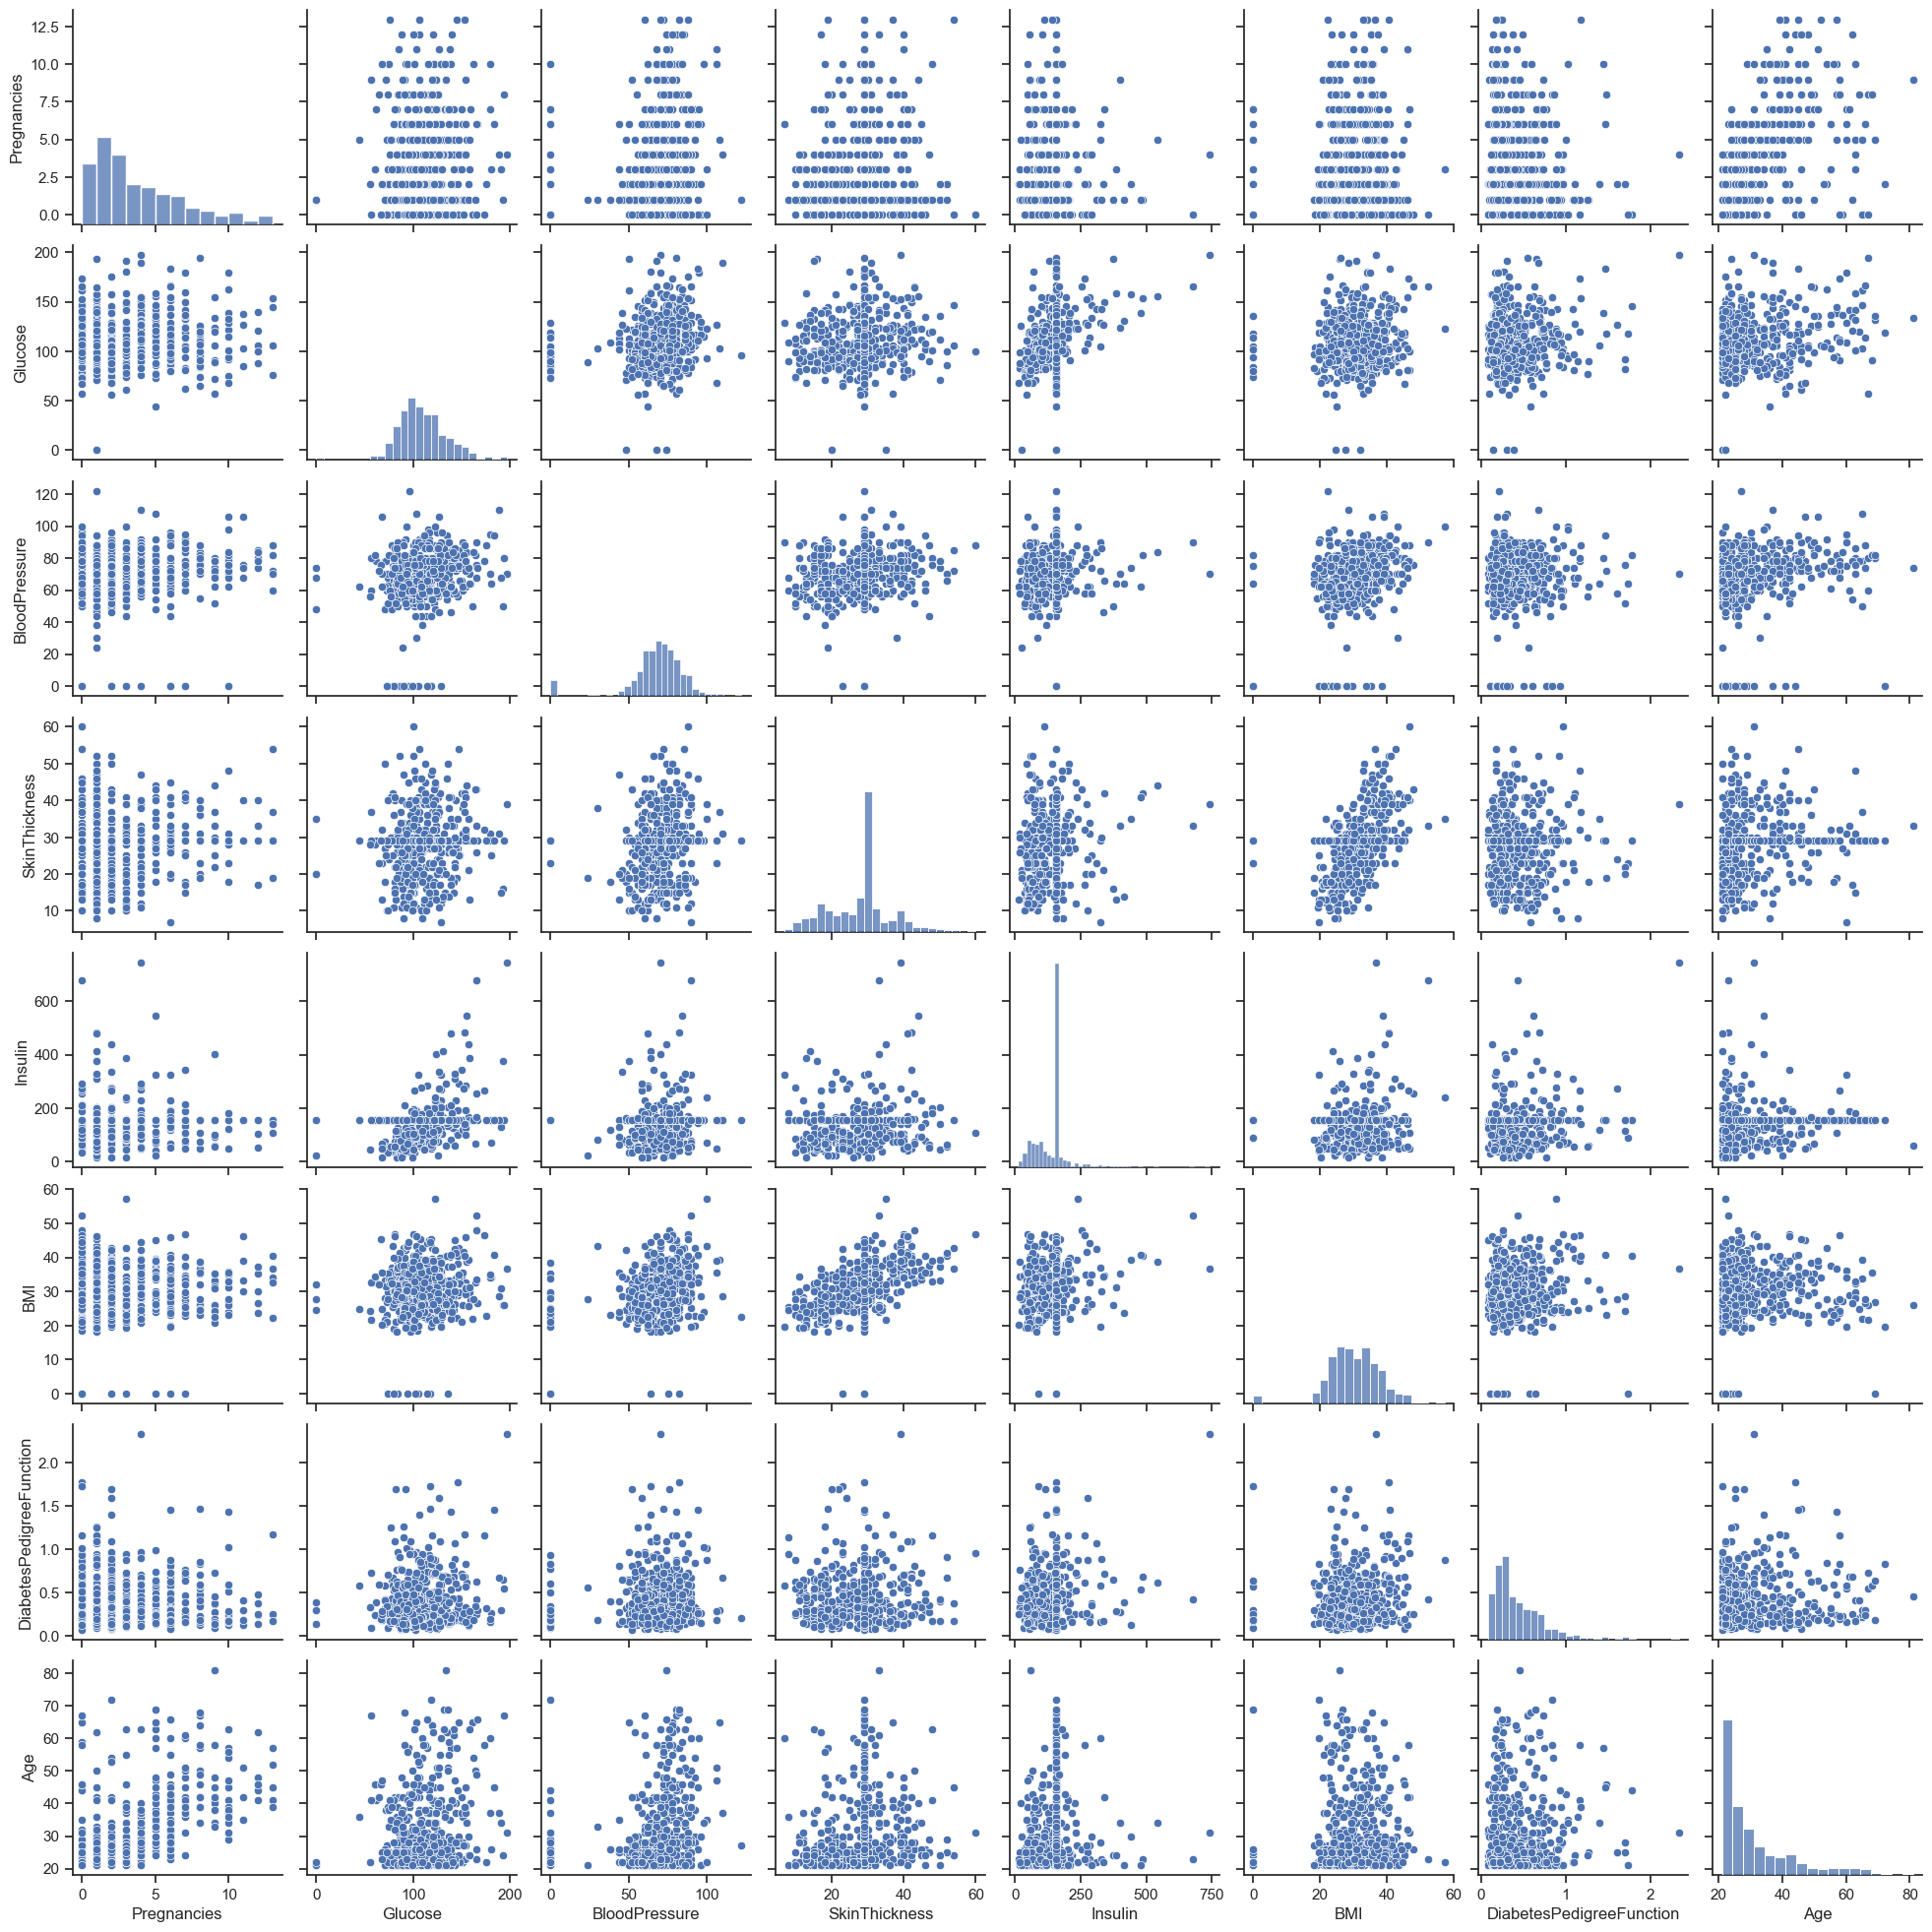

In [32]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Negative[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']])

In [33]:
dataset_imputed.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282       0.082989   
Glucose                      0.129459  1.000000       0.152590       0.182455   
BloodPressure                0.141282  0.152590       1.000000       0.123444   
SkinThickness                0.082989  0.182455       0.123444       1.000000   
Insulin                      0.056027  0.407699       0.045319       0.158139   
BMI                          0.017683  0.221071       0.281805       0.480496   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.100966   
Age                          0.544341  0.263514       0.239528       0.127872   
Outcome                      0.221898  0.466581       0.065068       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.017683                 -0.033523   
Glucose                   0.407699  0.221071                  0.137337   
BloodPressure             0.045319  0.281805                  0.041265   
SkinThickness             0.158139  0.480496                  0.100966   
Insulin                   1.000000  0.149468                  0.098634   
BMI                       0.149468  1.000000                  0.140647   
DiabetesPedigreeFunction  0.098634  0.140647                  1.000000   
Age                       0.136734  0.036242                  0.033561   
Outcome                   0.214411  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness             0.127872  0.215299  
Insulin                   0.136734  0.214411  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

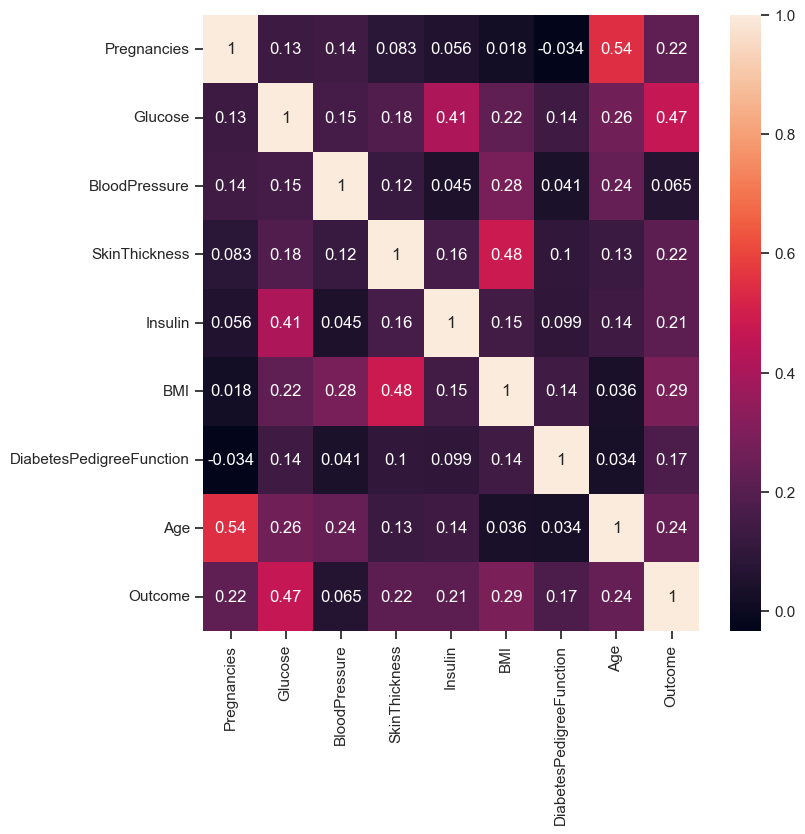

In [34]:
plt.subplots(figsize=(8,8))
sns.heatmap(dataset_imputed.corr(),annot=True) 

In [35]:
features = dataset_imputed.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset_imputed.iloc[:,8].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state =10)

In [36]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_train,y_train) 

LogisticRegression()

In [37]:
print(logRegModel.score(X_train,y_train))
print(logRegModel.score(X_test,y_test))
y_pred = logRegModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegModel.score(X_test, y_test)))

0.7719869706840391
0.7597402597402597
Accuracy of logistic regression classifier on test set: 0.76


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[86  9]
 [28 31]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.78      0.53      0.63        59

    accuracy                           0.76       154
   macro avg       0.76      0.72      0.72       154
weighted avg       0.76      0.76      0.75       154



AUC: 0.715


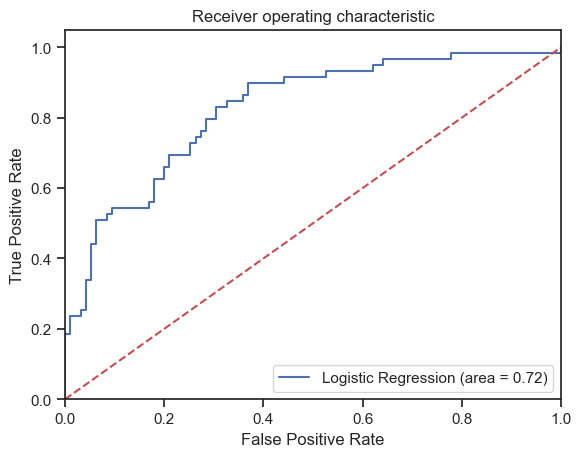

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logRegModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_roc_auc)
plt.show()

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
for i in range(3,20):
    print("For max_depth = ",i)
    DTModel = DecisionTreeClassifier(max_depth=i)
    DTModel.fit(X_train,y_train)
    y_pred = DTModel.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

For max_depth =  3
Accuracy: 0.6948051948051948
For max_depth =  4
Accuracy: 0.7467532467532467
For max_depth =  5
Accuracy: 0.7597402597402597
For max_depth =  6
Accuracy: 0.7662337662337663
For max_depth =  7
Accuracy: 0.7532467532467533
For max_depth =  8
Accuracy: 0.7467532467532467
For max_depth =  9
Accuracy: 0.7727272727272727
For max_depth =  10
Accuracy: 0.7532467532467533
For max_depth =  11
Accuracy: 0.7207792207792207
For max_depth =  12
Accuracy: 0.7077922077922078
For max_depth =  13
Accuracy: 0.7142857142857143
For max_depth =  14
Accuracy: 0.7077922077922078
For max_depth =  15
Accuracy: 0.7077922077922078
For max_depth =  16
Accuracy: 0.6883116883116883
For max_depth =  17
Accuracy: 0.6883116883116883
For max_depth =  18
Accuracy: 0.7142857142857143
For max_depth =  19
Accuracy: 0.6688311688311688


In [43]:
DTModel = DecisionTreeClassifier(max_depth=10)
DTModel.fit(X_train,y_train)
y_pred = DTModel.predict(X_test)
print(DTModel.score(X_train,y_train))
print(DTModel.score(X_test,y_test))

0.9267100977198697
0.7597402597402597


In [44]:
print('Accuracy of Decision Tree regression classifier on test set: {:.2f}'.format(DTModel.score(X_test, y_test)))

Accuracy of Decision Tree regression classifier on test set: 0.76


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[78 17]
 [20 39]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        95
           1       0.70      0.66      0.68        59

    accuracy                           0.76       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [46]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Precision score: 0.6964285714285714
Recall score: 0.6610169491525424


AUC: 0.741


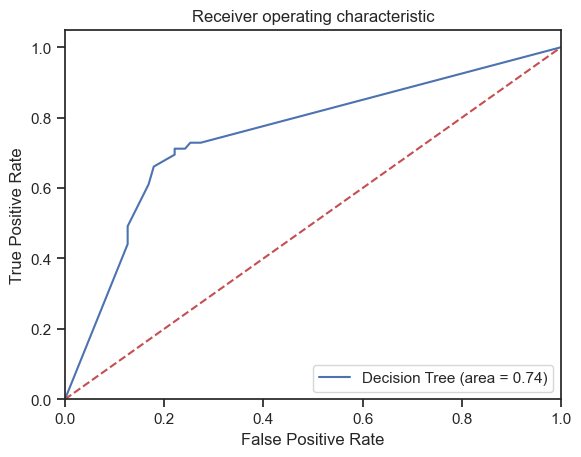

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, DTModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DTModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
print('AUC: %.3f' % dt_roc_auc)
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6910793933987511

In [49]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


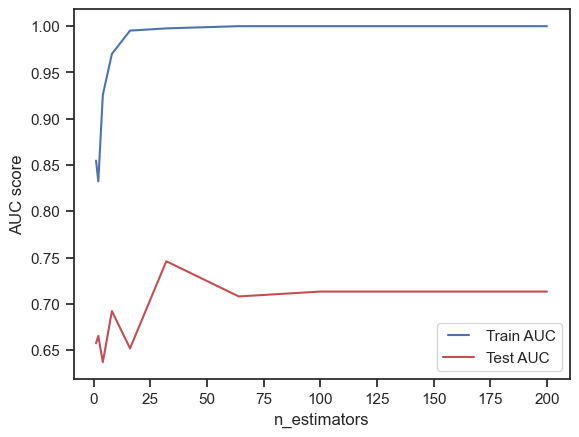

In [50]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [51]:
rfModel = RandomForestClassifier(n_estimators=60)
rfModel.fit(X_train, y_train)
y_pred = rfModel.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6995539696699375

In [52]:
print(rfModel.score(X_train,y_train))
print(rfModel.score(X_test,y_test))
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(rfModel.score(X_test, y_test)))

1.0
0.7402597402597403
Accuracy of Random Forest regression classifier on test set: 0.74


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[83 12]
 [28 31]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.72      0.53      0.61        59

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



In [54]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Precision score: 0.7209302325581395
Recall score: 0.5254237288135594


AUC: 0.700


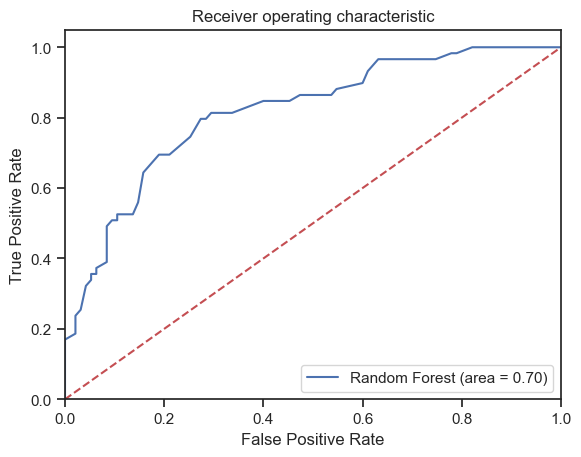

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rfModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('AUC: %.3f' % rf_roc_auc)
plt.show()

In [56]:
from sklearn.svm import SVC 
SVMmodel = SVC(kernel='rbf',gamma='auto')
SVMmodel.fit(X_train,y_train)
print(SVMmodel.score(X_train,y_train))
print(SVMmodel.score(X_test,y_test))

1.0
0.6168831168831169


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2)
knnClassifier.fit(X_train,y_train)
print(knnClassifier.score(X_train,y_train))
print(knnClassifier.score(X_test,y_test))

0.8045602605863192
0.7272727272727273


AUC: 0.739
True Positive Rate - [0.         0.10169492 0.20338983 0.40677966 0.54237288 0.61016949
 0.77966102 0.93220339 1.        ], False Positive Rate - [0.         0.01052632 0.03157895 0.10526316 0.15789474 0.27368421
 0.50526316 0.66315789 1.        ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

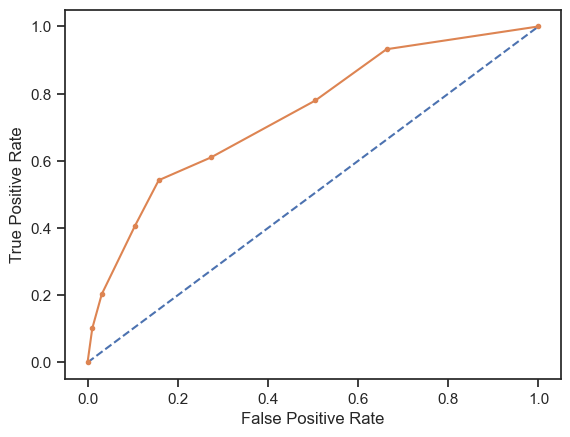

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = knnClassifier.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [59]:
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.73


f1=0.626 auc=0.759 ap=0.762


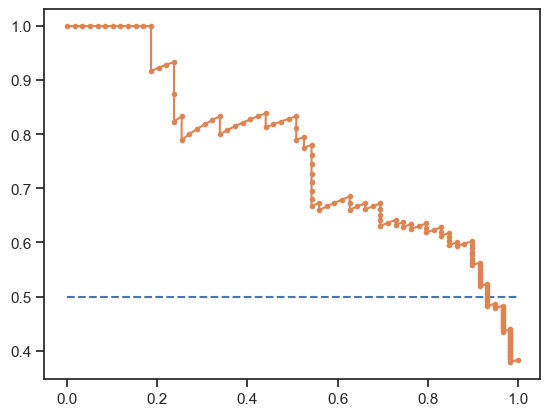

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = logRegModel.predict_proba(X_test)
probs = probs[:, 1]
yhat = logRegModel.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
auc = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')

f1=0.604 auc=0.661 ap=0.624


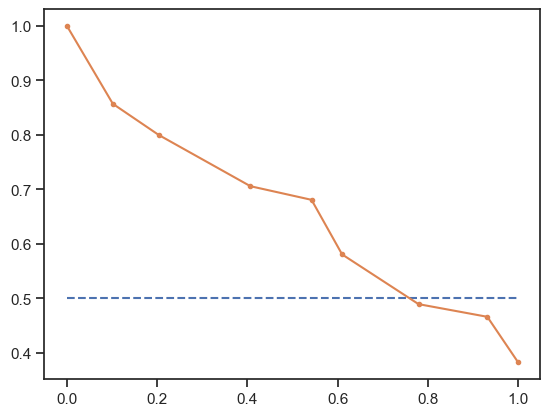

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

probs = knnClassifier.predict_proba(X_test)
probs = probs[:, 1]
yhat = knnClassifier.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, yhat)
auc = auc(recall, precision)
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')

f1=0.678 auc=0.706 ap=0.603


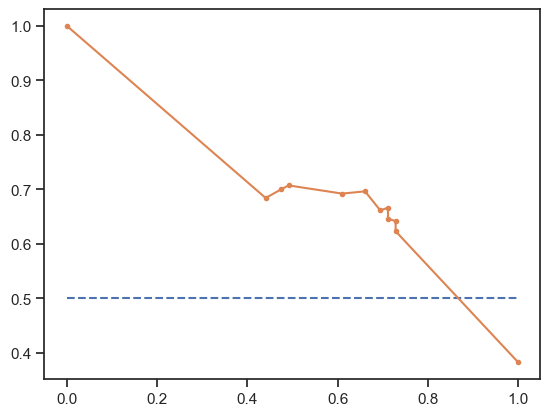

In [66]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = DTModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = DTModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.608 auc=0.747 ap=0.745


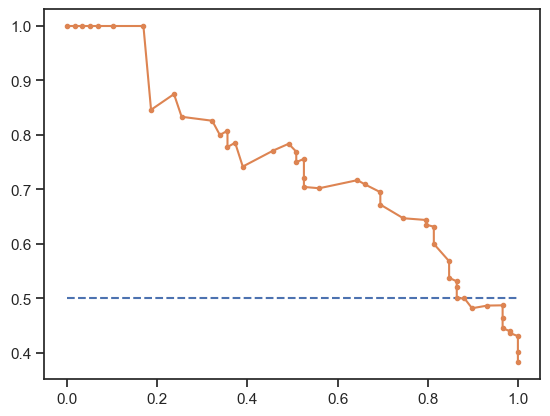

In [67]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = rfModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = rfModel.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

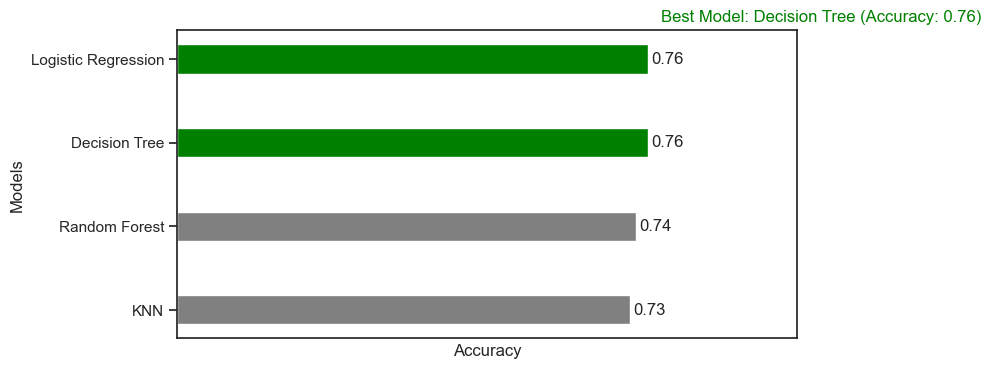

In [72]:
import numpy as np
models = ['KNN', 'Random Forest', 'Decision Tree', 'Logistic Regression']
accuracies = [0.73, 0.74, 0.76, 0.76]
colors = ['gray' if acc != max(accuracies) else 'green' for acc in accuracies]
fig, ax = plt.subplots(figsize=(8, 4))
index = np.arange(len(models))
bar_width = 0.35

rects = plt.barh(index, accuracies, bar_width, color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Models')
for i, rect in enumerate(rects):
    plt.text(rect.get_width() + 0.005, rect.get_y() + rect.get_height() / 2, f'{accuracies[i]:.2f}', ha='left', va='center')
best_model_index = accuracies.index(max(accuracies))
best_model_name = models[best_model_index]
best_accuracy = accuracies[best_model_index]
plt.text(0.78, len(models) - 0.5, f'Best Model: {best_model_name} (Accuracy: {best_accuracy:.2f})', fontsize=12, ha='left', va='center', color='green')

plt.yticks(index, models)
plt.xlim(0, 1)
plt.xticks([]) 
plt.show()
